# Exploratory Data Analysis do grafo populado

In [6]:

!pip install --upgrade pip
!pip install matplotlib

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\facordei\OneDrive - Capgemini\Documents\GitHub\Indigenous-Slavery-KG\.venv-IndigSlave\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from langchain_community.graphs import Neo4jGraph
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt

Conectando NEO4J

In [2]:
load_dotenv()

# Neo4j variables
NEO4J_URL = os.getenv("NEO4J_URL")
NEO4J_USERNAME =os.getenv("NEO4J_USERNAME")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD")

#Connecting to the graph
graph = Neo4jGraph(
    url=NEO4J_URL,
    username=NEO4J_USERNAME,
    password=NEO4J_PASSWORD
)

Estatísticas Iniciais

In [3]:
#Total de teses no grafo
total_thesis = len(graph.query("""
MATCH (thesis:Thesis)
RETURN thesis.uri
"""))

print(f'Total de teses no grafo: {total_thesis}')

Total de teses no grafo: 23073


In [4]:
#Total de excerpts no grafo (páginas extraídas de cada tese)
total_excerpts = len(graph.query("""
MATCH (excerpt:Excerpt)
RETURN excerpt.uri
"""))

print(f'Total de excerpts no grafo (páginas extraídas de cada tese): {total_excerpts}')

Total de excerpts no grafo (páginas extraídas de cada tese): 2347487


In [5]:
#Total de teses com excerpts no grafo
total_teses_com_excerpts = len(graph.query("""
MATCH (excerpt:Excerpt)--(thesis:Thesis)
RETURN DISTINCT(thesis.uri)
"""))

print(f'Total de teses com excerpts no grafo: {total_teses_com_excerpts}')

Total de teses com excerpts no grafo: 12950


In [39]:
#Total de teses por universidades
teses_por_universidade = graph.query("""
MATCH (thesis:Thesis)--(uni:University)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, uni.label as Universidade
ORDER BY Total_teses DESC
""")
teses_por_universidade = pd.DataFrame(teses_por_universidade, columns=['Total_teses', 'Universidade'])
print ('Total de universidades:', len(teses_por_universidade))
teses_por_universidade.head(10)

Total de universidades: 136


,Total_teses,Universidade
0,2208,Universidade de São Paulo (USP)
1,1221,Universidade de Brasília (UnB)
2,1049,Universidade Estadual de Campinas (UNICAMP)
3,957,Universidade Federal da Bahia (UFBA)
4,955,Universidade Federal do Rio Grande do Sul (UFRGS)
5,790,Universidade Federal de Santa Catarina (UFSC)
6,779,Universidade Estadual Paulista (UNESP)
7,744,Universidade Federal de Minas Gerais (UFMG)
8,710,Universidade Federal Rural do Rio de Janeiro (...
9,688,Pontifícia Universidade Católica de São Paulo ...


In [40]:
#Total de teses com excerpts por universidades
teses_por_universidade = graph.query("""
MATCH (thesis:Thesis)--(excerpt:Excerpt)
MATCH (thesis:Thesis)--(uni:University)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, uni.label as Universidade
ORDER BY Total_teses DESC
""")
teses_por_universidade = pd.DataFrame(teses_por_universidade, columns=['Total_teses', 'Universidade'])
print ('Total de universidades:', len(teses_por_universidade))
teses_por_universidade

Total de universidades: 29


,Total_teses,Universidade
0,2166,Universidade de São Paulo (USP)
1,1209,Universidade de Brasília (UnB)
2,870,Universidade Federal da Bahia (UFBA)
3,775,Universidade Estadual Paulista (UNESP)
4,765,Universidade Federal de Santa Catarina (UFSC)
5,733,Universidade Federal de Minas Gerais (UFMG)
6,708,Universidade Federal Rural do Rio de Janeiro (...
7,678,Pontifícia Universidade Católica de São Paulo ...
8,564,Universidade Federal de Pernambuco (UFPE)
9,552,Universidade Estadual de Campinas (UNICAMP)


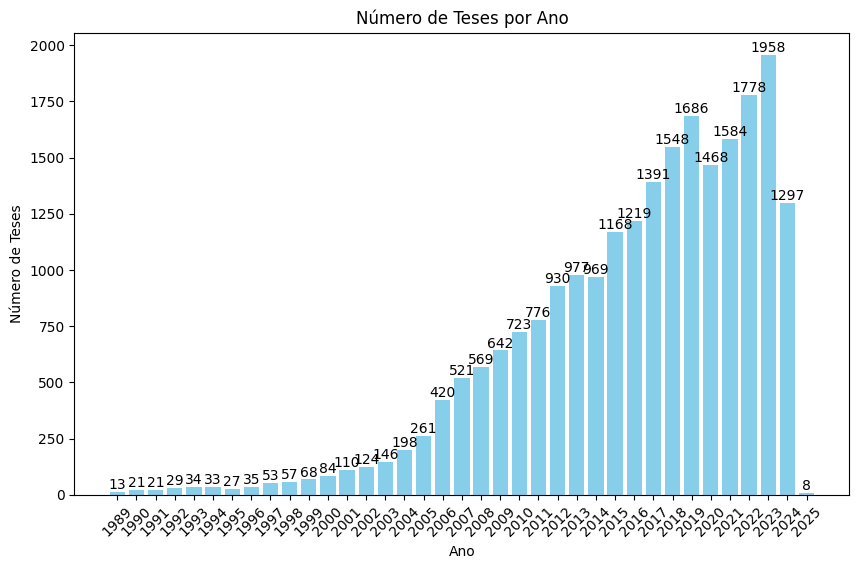

In [22]:
#Total de teses no grafo por ano
teses_por_ano = graph.query("""
MATCH (thesis:Thesis)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, thesis.created as Ano
ORDER BY thesis.created
""")

teses_por_ano = pd.DataFrame(teses_por_ano, columns=['Total_teses', 'Ano'])

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(teses_por_ano['Ano'][25:], teses_por_ano['Total_teses'][25:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Número de Teses')
plt.title('Número de Teses por Ano')
plt.xticks(rotation=45)
plt.show()

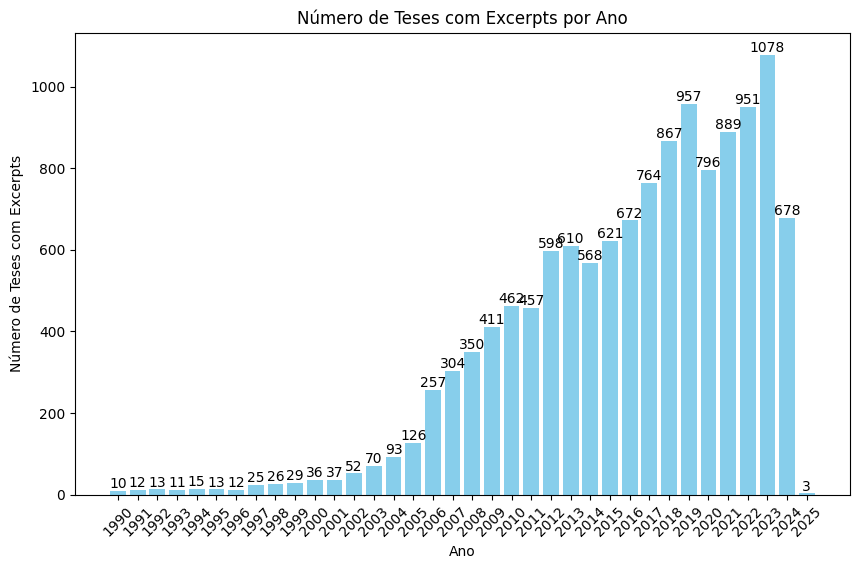

In [ ]:
#Total de teses com excerpts no grafo por ano
teses_por_ano = graph.query("""
MATCH (excerpt:Excerpt)--(thesis:Thesis)
RETURN COUNT(distinct(thesis.uri)) as Total_teses, thesis.created as Ano
ORDER BY thesis.created
""")

teses_por_ano = pd.DataFrame(teses_por_ano, columns=['Total_teses', 'Ano'])

#plotting the number of theses with excerpts per year
plt.figure(figsize=(10,6))

# Create the bar chart and store the bar container
bars = plt.bar(teses_por_ano['Ano'][25:], teses_por_ano['Total_teses'][25:], color='skyblue')

# Add labels to each bar
plt.bar_label(bars)

plt.xlabel('Ano')
plt.ylabel('Número de Teses com Excerpts')
plt.title('Número de Teses com Excerpts por Ano')
plt.xticks(rotation=45)
plt.show()

In [33]:
teses_por_ano

,Total_teses,Ano
0,1,1790
1,1,1947
2,1,1951
3,1,1954
4,1,1957
...,...,...
57,1584,2021
58,1778,2022
59,1958,2023
60,1297,2024


In [34]:
# reading CSV
teses_BDTD = pd.read_csv('data/BDTD_nov2025/teses_BDTD.csv')
teses_por_ano = teses_BDTD.groupby('Ano de defesa').size()

In [37]:
len(teses_BDTD)

101997